<a href="https://colab.research.google.com/github/bastiansosa/data-visualization/blob/main/visualizacion_de_datos(IRIS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
df_original = pd.read_csv("Iris.csv")
df_original.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df_original.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df_original.drop(columns='Id').groupby("Species").mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [ ]:
Iris_setosa=df_original["Species"]=="Iris-setosa"
Iris_versicolor=df_original["Species"]=="Iris-versicolor"
Iris_virginica=df_original["Species"]=="Iris-virginica"
df_original.loc[Iris_setosa].describe()
#df_original.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,25.50000,5.00600,3.418000,1.464000,0.24400
std,14.57738,0.35249,0.381024,0.173511,0.10721
min,1.00000,4.30000,2.300000,1.000000,0.10000
25%,13.25000,4.80000,3.125000,1.400000,0.20000
50%,25.50000,5.00000,3.400000,1.500000,0.20000
75%,37.75000,5.20000,3.675000,1.575000,0.30000
max,50.00000,5.80000,4.400000,1.900000,0.60000


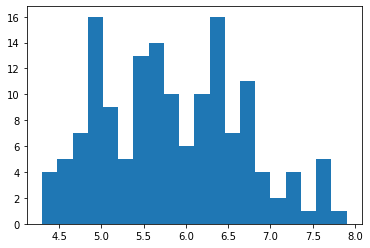

In [ ]:
#Histograma o grafico de barras
plt.hist(df_original["SepalLengthCm"], bins=20);

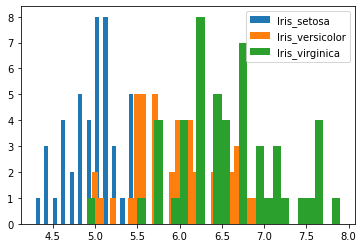

In [ ]:
#Label permite ingresar la leyenda al grafico (Especie en este caso)
#Bins permite dividir en n barras o bins el histograma
plt.hist(df_original.loc[Iris_setosa,"SepalLengthCm"], bins=30,label="Iris_setosa"); 
plt.hist(df_original.loc[Iris_versicolor,"SepalLengthCm"], bins=30,label="Iris_versicolor"); 
plt.hist(df_original.loc[Iris_virginica,"SepalLengthCm"], bins=30,label="Iris_virginica"); 
plt.legend()

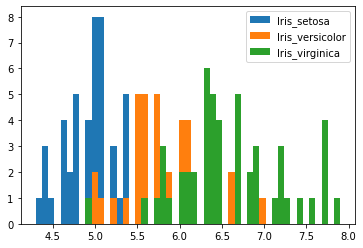

In [ ]:
bins = np.linspace(min(df_original.loc[Iris_setosa,"SepalLengthCm"].min(), df_original.loc[Iris_virginica,"SepalLengthCm"].min()), max(df_original.loc[Iris_setosa,"SepalLengthCm"].max(), df_original.loc[Iris_virginica,"SepalLengthCm"].max()), 50)
plt.hist(df_original.loc[Iris_setosa,"SepalLengthCm"], bins=bins,label="Iris_setosa"); 
plt.hist(df_original.loc[Iris_versicolor,"SepalLengthCm"], bins=bins,label="Iris_versicolor"); 
plt.hist(df_original.loc[Iris_virginica,"SepalLengthCm"], bins=bins,label="Iris_virginica"); 
plt.legend()

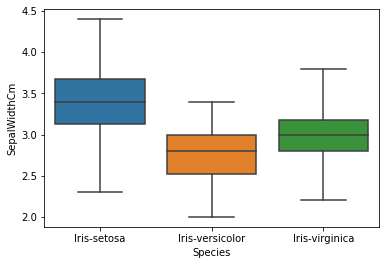

In [ ]:
 #x=df_original.loc[Iris_setosa]
# y=df_original.loc[Iris_setosa,"SepalWidthCm"].to_numpy()

#sb.boxplot(x="type", y="SepalLengthCm", data=x, whis=3.0);
sb.boxplot(x="Species", y="SepalWidthCm", data=df_original, whis=3);

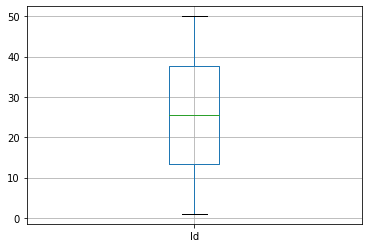

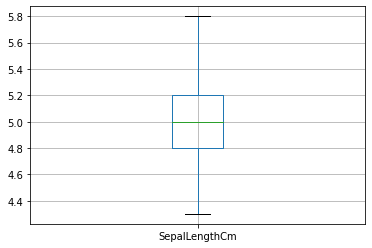

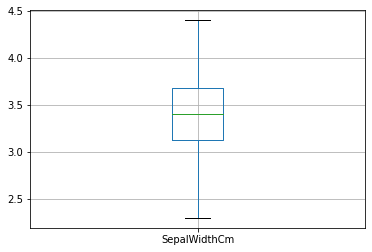

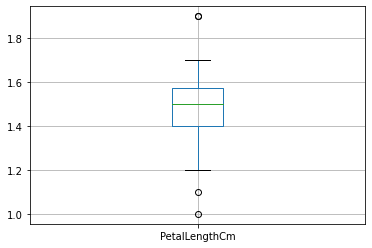

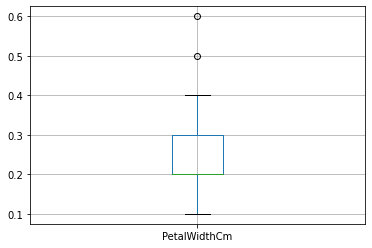

In [ ]:
df=df_original.loc[Iris_setosa]
#df.reset_index(drop=True)
for column in df:
    if df[column].dtype in ['int64', 'float64']:
      #plt o el plot permite crear un "lienzo"
      #donde podamos ir agregando las figuras
        plt.figure()
        #Pandas tiene su propia forma de graficar
        #Cada uno de los boxplot se agrega al mismo plot
        df.boxplot(column = [column])

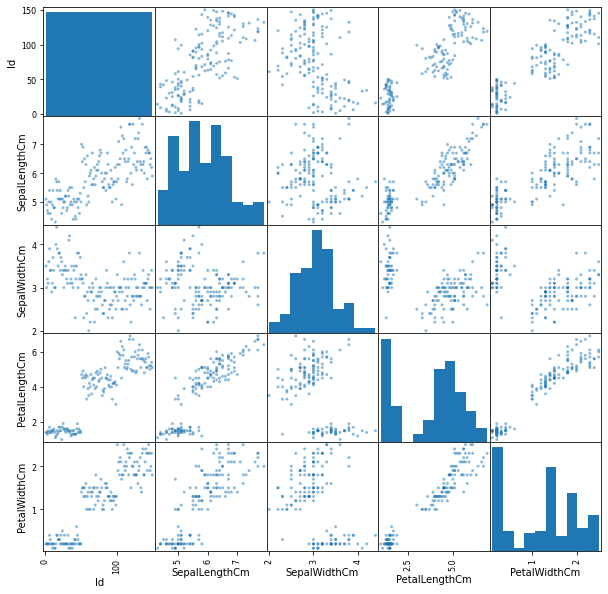

In [ ]:
#Escater matrix cruza las columnas para ir mostrando 
#su grafico
pd.plotting.scatter_matrix(df_original, figsize=(10,10));

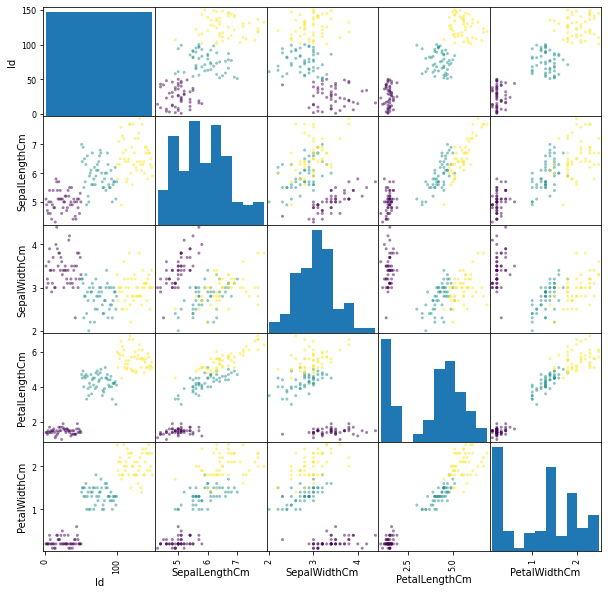

In [ ]:
#colors = df_original["Species"].map(lambda x: "#44d9ff" if x else "#f95b4a")
#Se define el color y se reemplaza por cada una de las especies
colors = df_original['Species'].replace({'Iris-setosa':1, 'Iris-versicolor': 2, 'Iris-virginica':3})
pd.plotting.scatter_matrix(df_original, figsize=(10,10), c=colors, cmap='viridis');

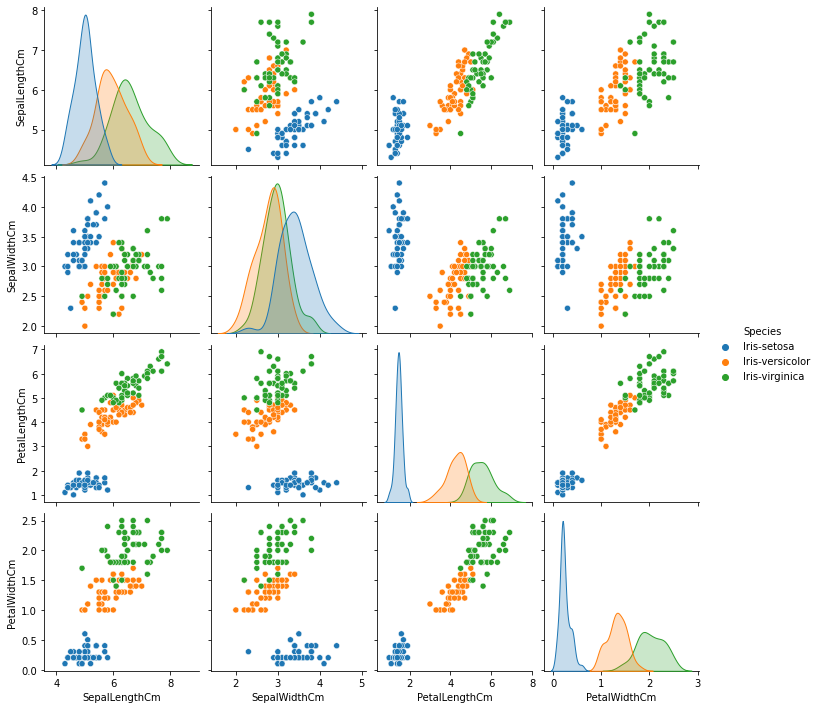

In [ ]:
sb.pairplot(data = df_original.drop(columns='Id'), hue = 'Species', diag_kind = 'kde')


In [ ]:
df_original.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


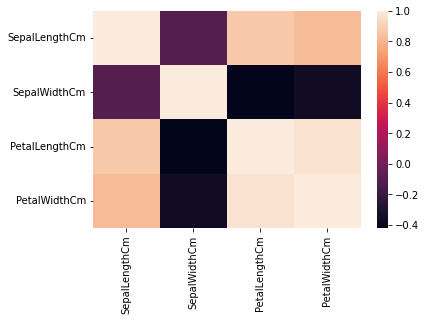

In [ ]:
sb.heatmap(df_original.drop(columns='Id').corr(),);

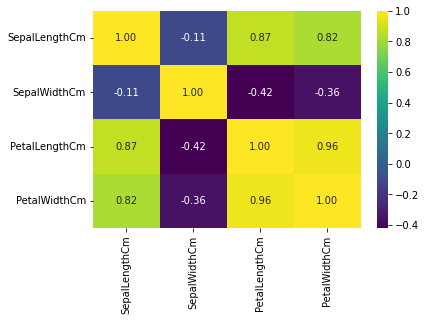

In [ ]:
sb.heatmap(df_original.drop(columns='Id').corr(), annot=True, cmap="viridis", fmt="0.2f");

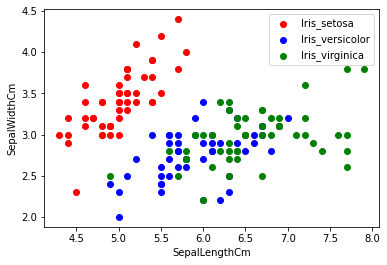

In [ ]:
#Dividimos los datos por tipos
x1=df_original.loc[Iris_setosa,"SepalLengthCm"]
y1=df_original.loc[Iris_setosa,"SepalWidthCm"]
x2=df_original.loc[Iris_versicolor,"SepalLengthCm"]
y2=df_original.loc[Iris_versicolor,"SepalWidthCm"]
x3=df_original.loc[Iris_virginica,"SepalLengthCm"]
y3=df_original.loc[Iris_virginica,"SepalWidthCm"]
#Reemplazamos los valores nominales por numero para asignar color
colors = df_original['Species'].replace({'Iris-setosa':1, 'Iris-versicolor': 2, 'Iris-virginica':3})

#Graficos 3 scatter por separado, donde se agrega uno por tipo
#de flor
#Scatter (Datos en x, Datos en Y, Color, y etiqueta)
plt.scatter(x1, y1, color="red",label="Iris_setosa")
plt.scatter(x2, y2, color="blue",label="Iris_versicolor")
plt.scatter(x3, y3, color="green",label="Iris_virginica")
#Colocar los nombres a los ejes
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
#Dar la instruccion de mostrar las legendas         
plt.legend();

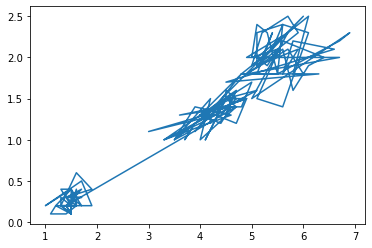

In [ ]:
plt.plot(df_original["PetalLengthCm"],df_original["PetalWidthCm"])

In [ ]:
x = df_original["PetalLengthCm"]
y = df_original["PetalWidthCm"]
x_data = x[:,np.newaxis]

<ipython-input-28-73aaca08af4b>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_data = x[:,np.newaxis]


In [ ]:
lm = LinearRegression()
lm.fit(x_data,y) 

LinearRegression()

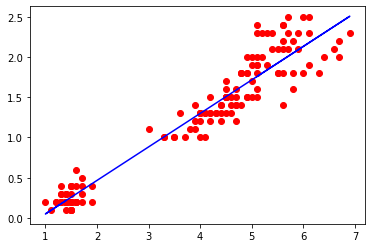

In [ ]:
%matplotlib inline 
plt.plot(x,y,"ro")
plt.plot(x,lm.predict(x_data), color="blue")

In [ ]:
lm.score(x_data,y) 

0.9269012279220037

In [ ]:
SSD = np.sum((y-lm.predict(x_data))**2)
RSE = np.sqrt(SSD/(len(x_data)-1))
y_mean = np.mean(y)
error = RSE/y_mean
SSD,RSE,y_mean,error

(6.343491947922636,
 0.20633412578283802,
 1.1986666666666668,
 0.17213636744953115)

In [ ]:
lm.intercept_,lm.coef_

(-0.3665140452167275, array([0.41641913]))